## Data Visualization

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.rename(columns = {'rent amount (R$)': 'rent_amount'}, inplace = True)

In [4]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent_amount,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


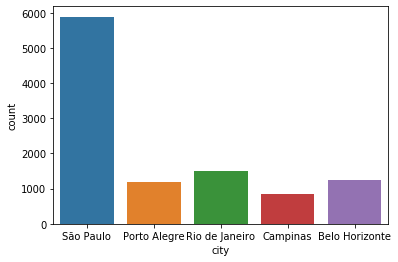

In [5]:
sns.countplot(x = 'city', data = df)

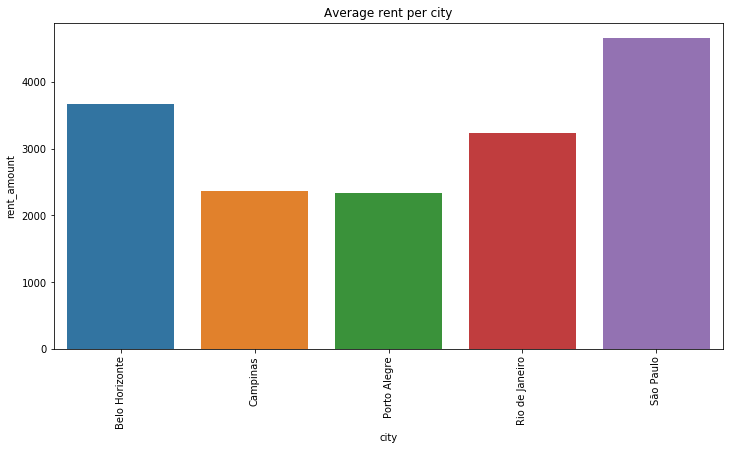

In [6]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'city', y = 'rent_amount', data = df.groupby('city')['rent_amount'].mean().reset_index())
plt.title('Average rent per city')
plt.xticks(rotation = 90)
plt.show()

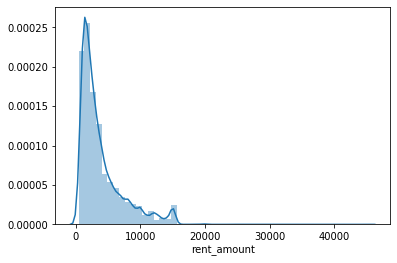

In [7]:
sns.distplot(df['rent_amount'])

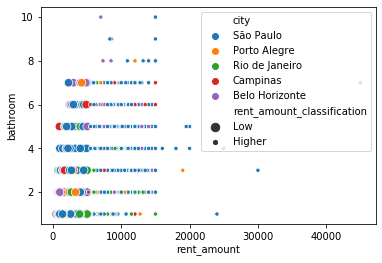

In [8]:
df['rent_amount_classification'] = ['Higher' if x > 5000 else 'Low' for x in df ['rent_amount']]

sns.scatterplot(x = 'rent_amount', y = 'bathroom', hue = 'city', size = 'rent_amount_classification', data = df)

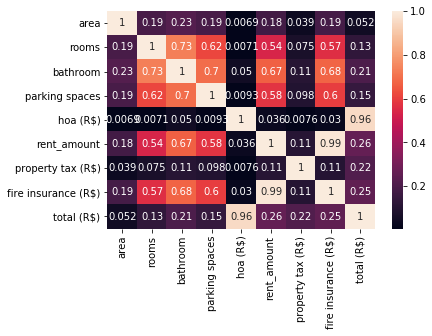

In [9]:
sns.heatmap(df.corr(), annot = True)

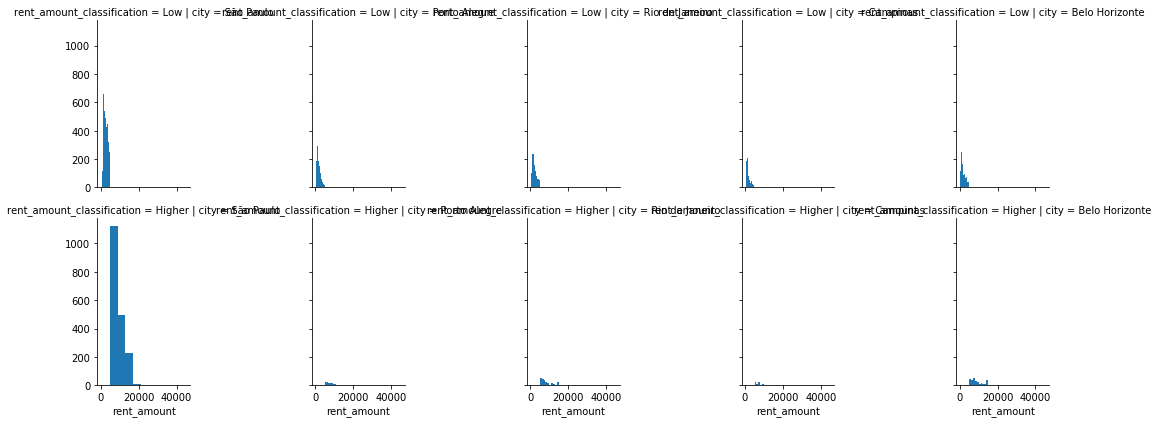

In [11]:
g = sns.FacetGrid(df, col = 'city', row = 'rent_amount_classification')
g = g.map(plt.hist, 'rent_amount')
g

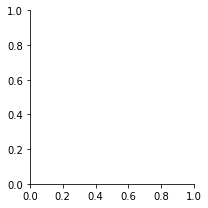

In [10]:
sns.FacetGrid(df)